# ANALISIS PREFERENSI KONSUMEN BERDASARKAN KATEGORI PRODUK DAN HARGA DISKON MENGGUNAKAN K-MEANS CLUSTERING

#### Dasmond Tan - 00000070110
#### Willsen Wijaya - 00000070011
#### Jonathan Widarta - 00000070494
#### Alvin Agustio Hans - 00000069467

# Data Understanding

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [3]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [4]:
df.shape

(1465, 16)

# Data Preprocessing

In [5]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

df = df[df['rating'] != '|']
df['rating'] = df['rating'].astype(float)

df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = df['rating_count'].astype('float64')

C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\3581725469.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)
C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\3581725469.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].str.replace(',', '')
C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\3581725469.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [9]:
df['first_category'] = df['category'].str.split('|').str[0]
df.head()

C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\3167243643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_category'] = df['category'].str.split('|').str[0]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,first_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [10]:
df = df.drop(columns=['category'])
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,first_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   discounted_price     1462 non-null   float64
 3   actual_price         1462 non-null   float64
 4   discount_percentage  1462 non-null   float64
 5   rating               1462 non-null   float64
 6   rating_count         1462 non-null   float64
 7   about_product        1462 non-null   object 
 8   user_id              1462 non-null   object 
 9   user_name            1462 non-null   object 
 10  review_id            1462 non-null   object 
 11  review_title         1462 non-null   object 
 12  review_content       1462 non-null   object 
 13  img_link             1462 non-null   object 
 14  product_link         1462 non-null   object 
 15  first_category       1462 non-null   o

In [12]:
df.nunique()

product_id             1348
product_name           1334
discounted_price        550
actual_price            449
discount_percentage      92
rating                   25
rating_count           1142
about_product          1290
user_id                1191
user_name              1191
review_id              1191
review_title           1191
review_content         1209
img_link               1409
product_link           1462
first_category            9
dtype: int64

In [13]:
category_counts = df['first_category'].value_counts()
print(category_counts)

Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: first_category, dtype: int64


# Handling Outliers

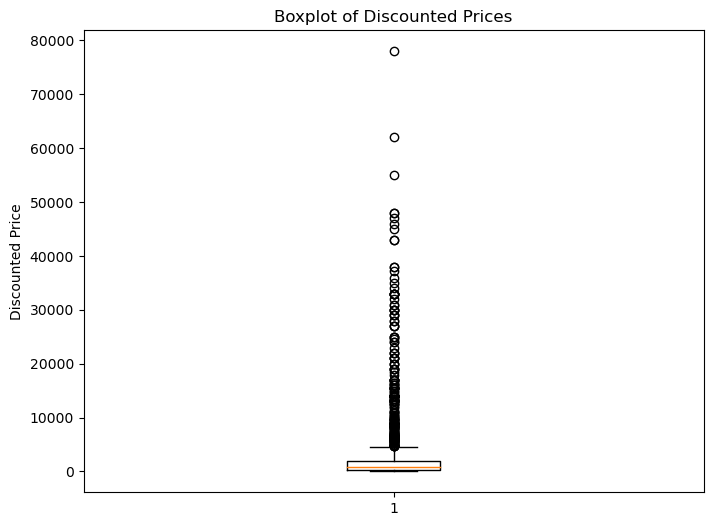

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['discounted_price'])
plt.title('Boxplot of Discounted Prices')
plt.ylabel('Discounted Price')
plt.show()

In [15]:
import numpy as np
from scipy import stats

zscores = np.abs(stats.zscore(df['discounted_price']))
threshold = 3
outlierfind = np.where(zscores > threshold)
outliervalue = df['discounted_price'].iloc[outlierfind]
print("Outlier Indices:", outlierfind)
print("Outlier Values:", outliervalue)

Outlier Indices: (array([  38,   61,   72,   85,   86,   87,   91,  108,  124,  130,  135,
        150,  171,  192,  197,  216,  231,  232,  249,  255,  270,  276,
        282,  291,  294,  305,  322,  323,  324,  330,  337,  338,  392,
        404,  408,  531,  541,  542,  566,  974, 1012, 1303, 1351],
      dtype=int64),)
Outlier Values: 38      32999.0
61      32990.0
72      26999.0
85      29999.0
86      27999.0
87      30990.0
91      24999.0
108     37999.0
124     32999.0
130     23999.0
135     30990.0
150     29990.0
171     32999.0
192     47990.0
197     24999.0
216     42999.0
231     31999.0
232     32990.0
249     77990.0
255     54990.0
270     35999.0
276     45999.0
283     47990.0
292     32990.0
295     29999.0
306     26999.0
323     24990.0
325     61999.0
326     24499.0
332     46999.0
339     28999.0
340     28999.0
394     28999.0
406     33999.0
410     34999.0
533     44999.0
543     23999.0
544     29990.0
568     37990.0
976     26999.0
1014    37247.0
13

In [16]:
import numpy as np
from scipy import stats

zscores = np.abs(stats.zscore(df['discounted_price']))
threshold = 3
df = df[zscores <= threshold]
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,first_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0

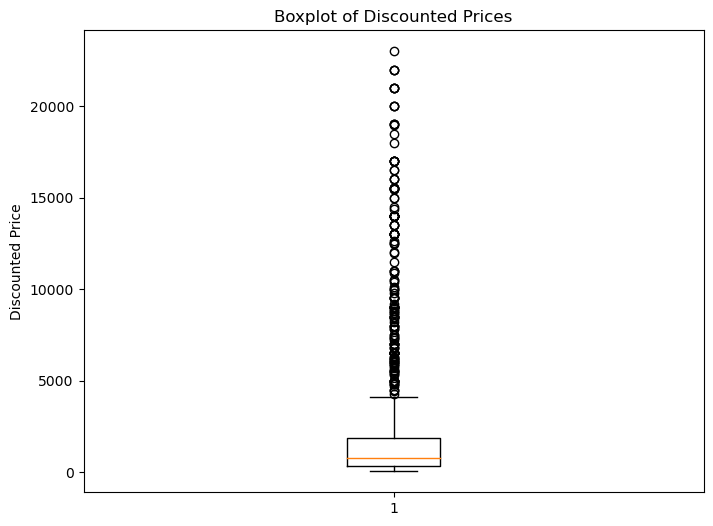

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['discounted_price'])
plt.title('Boxplot of Discounted Prices')
plt.ylabel('Discounted Price')
plt.show()

# Data Visualization

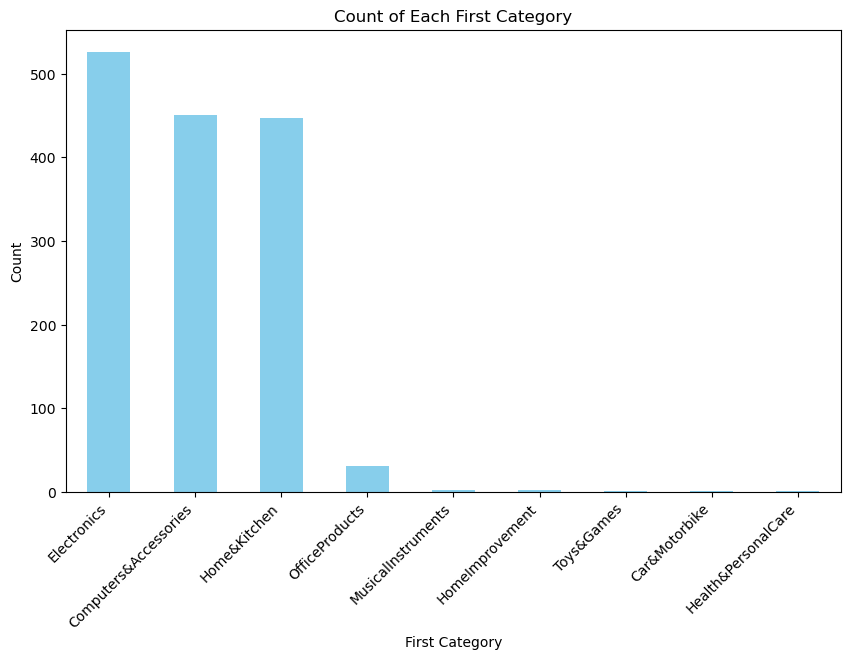

In [18]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('First Category')
plt.ylabel('Count')
plt.title('Count of Each First Category')
plt.xticks(rotation=45, ha='right')
plt.show()

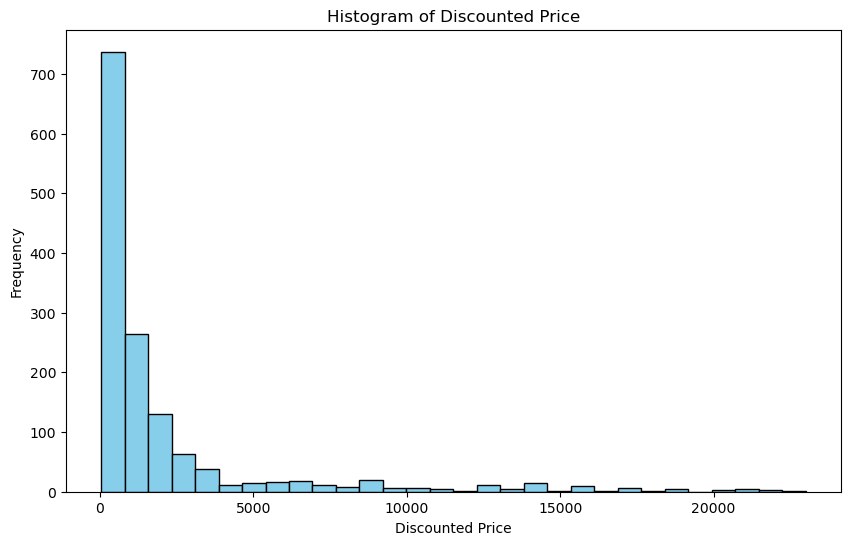

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['discounted_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.title('Histogram of Discounted Price')
plt.show()

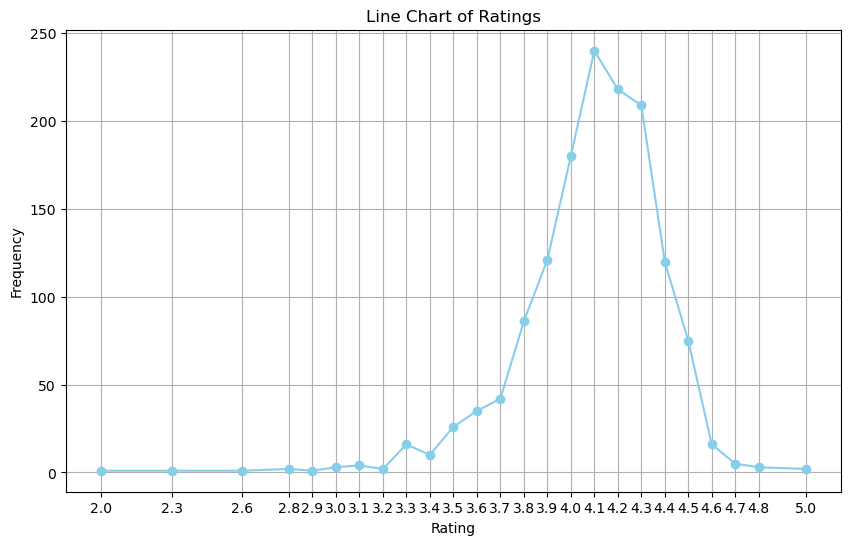

In [20]:
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Line Chart of Ratings')
plt.xticks(rating_counts.index)
plt.grid(True)
plt.show()

C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

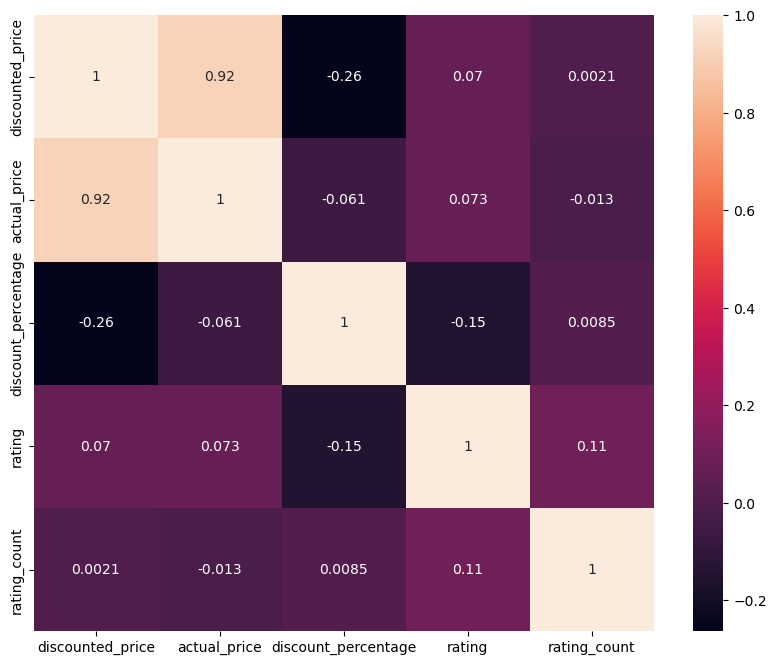

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Normalization & Feature Initialization

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
label_encoder = LabelEncoder()
filtered_df = df[df['first_category'].isin(['Electronics', 'Computers&Accessories', 'Home&Kitchen'])]
filtered_df['encoded_category'] = label_encoder.fit_transform(filtered_df['first_category'])

C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\3120057474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['encoded_category'] = label_encoder.fit_transform(filtered_df['first_category'])


In [23]:
X = filtered_df[['rating', 'encoded_category']].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
clus2 = df[['rating', 'discounted_price']].values

scaler_clus2 = MinMaxScaler()
clus2_scaled = scaler_clus2.fit_transform(clus2)

# Define Number of Cluster

# Permasalahan 1

In [25]:
def plot_elbow(inertia_values, w=8, h=6):
    plt.figure(figsize=(w, h))
    plt.plot(range(2, 8), inertia_values, marker='o', linestyle='-')
    plt.xticks(range(2, 8))
    plt.axvline(x=3, linestyle="-.", c='red')
    ax = plt.gca()
    ax.tick_params("both", labelsize=(w+h)/2)
    ax.set_xlabel("K", fontsize=22)
    ax.set_ylabel("Inertia",fontsize=22)

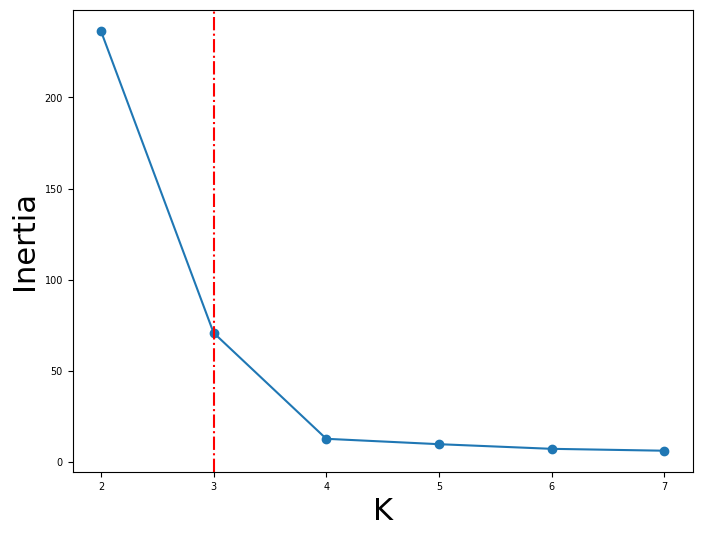

In [26]:
inertia_values = list()
for k in range(1, 7):
    inertia_values.append(KMeans(n_clusters=k).fit(X_scaled).inertia_)
plot_elbow(inertia_values)

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7]
for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=0)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    silhoutte_avg = silhouette_score(X_scaled, cluster_labels)
    print ("For n_clusters={0}, the silhoutte score is {1}".format(num_clusters, silhoutte_avg))

For n_clusters=2, the silhoutte score is 0.6522847283783159
For n_clusters=3, the silhoutte score is 0.8060239514753554
For n_clusters=4, the silhoutte score is 0.7412976975596669
For n_clusters=5, the silhoutte score is 0.6642169195558345
For n_clusters=6, the silhoutte score is 0.5928008575814441
For n_clusters=7, the silhoutte score is 0.5911427138912937


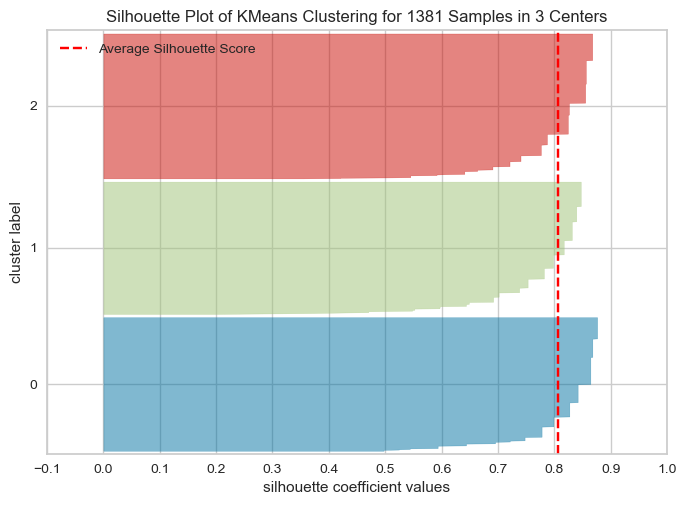

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1381 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

# Permasalahan 2

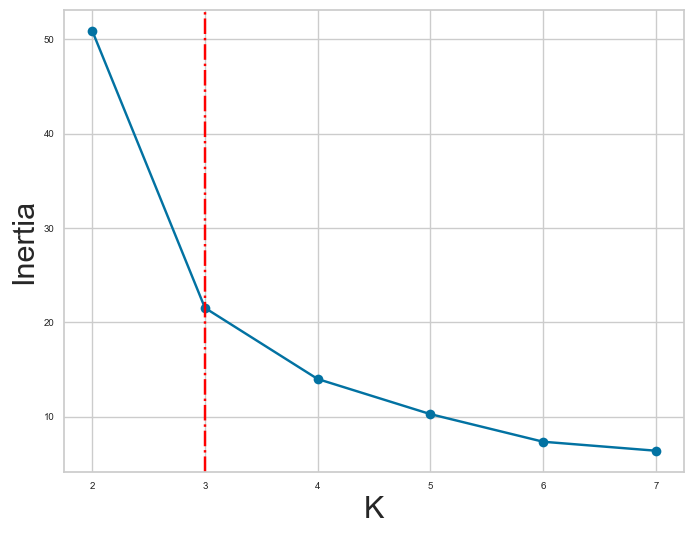

In [29]:
inertia_values = list()
for k in range(1, 7):
    inertia_values.append(KMeans(n_clusters=k).fit(clus2_scaled).inertia_)
plot_elbow(inertia_values)

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=0)
    kmeans.fit(clus2_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(clus2_scaled, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.719674009870586
For n_clusters = 3, the silhouette score is 0.43578938983752064
For n_clusters = 4, the silhouette score is 0.46446879109679345
For n_clusters = 5, the silhouette score is 0.43065135284657013
For n_clusters = 6, the silhouette score is 0.4236157130929649
For n_clusters = 7, the silhouette score is 0.4068181977049911


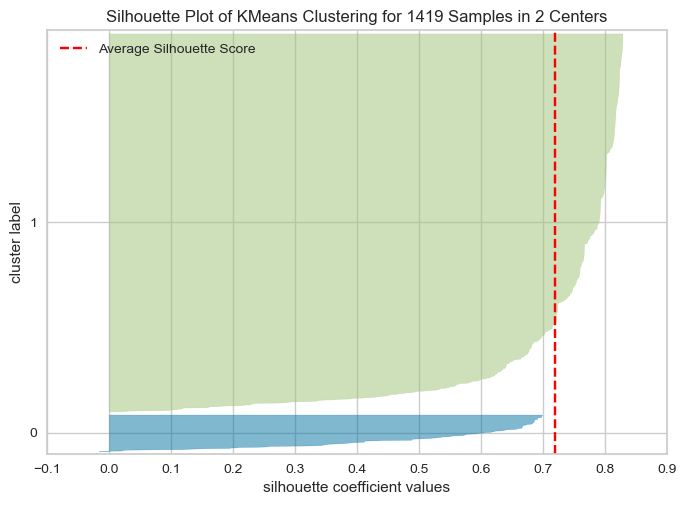

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1419 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
#20
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(clus2_scaled)
visualizer.show()

# Modelling

## Permasalahan 1

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

## Permasalahan 2

In [33]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
y_kmeans_clus2 = kmeans2.fit_predict(clus2_scaled)

# Cluster Visualization

## Permasalahan 1

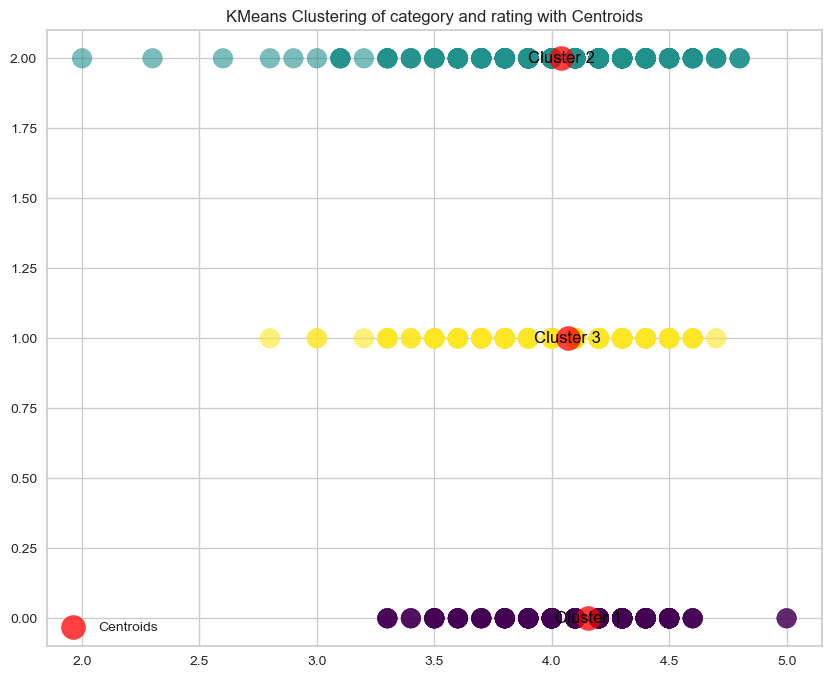

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=200, cmap='viridis', alpha=0.6)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, label='Centroids')
plt.title('KMeans Clustering of category and rating with Centroids')
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'Cluster {i+1}', fontsize=12, color='black', ha='center', va='center')
plt.legend()
plt.show()

In [35]:
X_inverse = scaler.inverse_transform(X_scaled)
filtered_df['cluster'] = y_kmeans
dominant_categories = {}

for cluster in range(3):  
    cluster_indices = np.where(y_kmeans == cluster)[0]
    cluster_data = filtered_df.iloc[cluster_indices]
    category_counts = cluster_data['first_category'].value_counts()
    dominant_category = category_counts.idxmax()
    dominant_categories[cluster] = dominant_category
    
for cluster, category in dominant_categories.items():
    print(f"Cluster {cluster+1}: {category}")

Cluster 1: Computers&Accessories
Cluster 2: Home&Kitchen
Cluster 3: Electronics


C:\Users\alvin\AppData\Local\Temp\ipykernel_27968\924551458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = y_kmeans


## Permasalahan 2

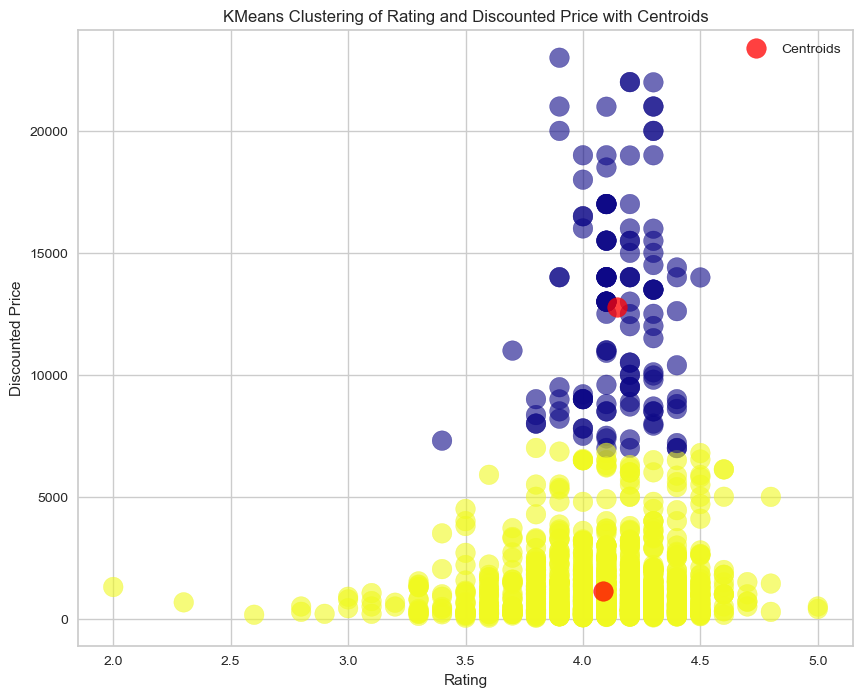

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(clus2[:, 0], clus2[:, 1], c=y_kmeans_clus2, s=200, cmap='plasma', alpha=0.6)
centers_clus2 = scaler_clus2.inverse_transform(kmeans2.cluster_centers_)  
plt.scatter(centers_clus2[:, 0], centers_clus2[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.title('KMeans Clustering of Rating and Discounted Price with Centroids')
plt.legend()
plt.show()

# Evaluation

## Permasalahan 1

In [37]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(X_scaled, y_kmeans)
print("Davies-Bouldin Index (DBI):", dbi_score)

Davies-Bouldin Index (DBI): 0.2885381987097397


## Permasalahan 2

In [38]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(clus2_scaled, y_kmeans_clus2)
print("Davies-Bouldin Index (DBI):", dbi_score)

Davies-Bouldin Index (DBI): 0.5045336305154511
